## Cluster.json creation

NO requirements

In [ ]:
! pip install transformers datasets huggingface_hub
from datasets import load_dataset, load_metric
datasets = load_dataset("squad_v2", split='train')

import pandas as pd
df_squad_v2 = pd.DataFrame( datasets )
from datasets import Dataset


def split_by_themes(df_squad_v2):
  # extracting the themes
  themes = df_squad_v2.title.unique()
  squad_v2_df_dict = {elem : pd.DataFrame() for elem in themes}
  for key in squad_v2_df_dict.keys():
    squad_v2_df_dict[key] = df_squad_v2[:][df_squad_v2.title == key]
  return squad_v2_df_dict

squad_v2_df_dict = split_by_themes(df_squad_v2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
keys = list(squad_v2_df_dict.keys())

print(keys)

['Beyoncé', 'Frédéric_Chopin', 'Sino-Tibetan_relations_during_the_Ming_dynasty', 'IPod', 'The_Legend_of_Zelda:_Twilight_Princess', 'Spectre_(2015_film)', '2008_Sichuan_earthquake', 'New_York_City', 'To_Kill_a_Mockingbird', 'Solar_energy', 'Kanye_West', 'Buddhism', 'American_Idol', 'Dog', '2008_Summer_Olympics_torch_relay', 'Genome', 'Comprehensive_school', 'Republic_of_the_Congo', 'Prime_minister', 'Institute_of_technology', 'Wayback_Machine', 'Dutch_Republic', 'Symbiosis', 'Canadian_Armed_Forces', 'Cardinal_(Catholicism)', 'Iranian_languages', 'Lighting', 'Separation_of_powers_under_the_United_States_Constitution', 'Architecture', 'Human_Development_Index', 'Southern_Europe', 'BBC_Television', 'Arnold_Schwarzenegger', 'Plymouth', 'Heresy', 'Warsaw_Pact', 'Materialism', 'Christian', 'Sony_Music_Entertainment', 'Oklahoma_City', 'Hunter-gatherer', 'United_Nations_Population_Fund', 'Russian_Soviet_Federative_Socialist_Republic', 'Alexander_Graham_Bell', 'Pub', 'Internet_service_provider',

In [ ]:
!pip3 install unidecode
from unidecode import unidecode
import re
final_items = []

for item in keys:
  print(item)
  # replacing foreign alphabets with the normal english ones
  item = unidecode(item)

  # removing all numbers as they are of no use
  order = r'[0 - 9]'
  item = re.sub(order, '', item)

  for seperators in ['_', '-', "%", "$","&","@", "(",")",'[',']','{', "}", ":", ";", "?", "<", ">", "!" ]:
    item = item.replace(seperators, " ")
  final_items.append(item)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Beyoncé
Frédéric_Chopin
Sino-Tibetan_relations_during_the_Ming_dynasty
IPod
The_Legend_of_Zelda:_Twilight_Princess
Spectre_(2015_film)
2008_Sichuan_earthquake
New_York_City
To_Kill_a_Mockingbird
Solar_energy
Kanye_West
Buddhism
American_Idol
Dog
2008_Summer_Olympics_torch_relay
Genome
Comprehensive_school
Republic_of_the_Congo
Prime_minister
Institute_of_technology
Wayback_Machine
Dutch_Republic
Symbiosis
Canadian_Armed_Forces
Cardinal_(Catholicism)
Iranian_languages
Lighting
Separation_of_powers_under_the_United_States_Constitution
Architecture
Human_Development_Index
Southern_Europe
BBC_Television
Arnold_Schwarzenegger
Plymouth
Heresy
Warsaw_Pact
Materialism
Christian
Sony_Music_Entertainment
Oklahoma_City
Hunter-gatherer
United_Nations_Population_Fund
Russian_Soviet_Federative_Socialist_Republic
Alexander_Graham_Bell
Pub
Internet_service_provider
Comics
Saint_Helena
Aspirated_consonant

In [ ]:
final_items

['Beyonce',
 'Frederic Chopin',
 'Sino Tibetan relations during the Ming dynasty',
 'IPod',
 'The Legend of Zelda  Twilight Princess',
 'Spectre  215 film ',
 '28 Sichuan earthquake',
 'New York City',
 'To Kill a Mockingbird',
 'Solar energy',
 'Kanye West',
 'Buddhism',
 'American Idol',
 'Dog',
 '28 Summer Olympics torch relay',
 'Genome',
 'Comprehensive school',
 'Republic of the Congo',
 'Prime minister',
 'Institute of technology',
 'Wayback Machine',
 'Dutch Republic',
 'Symbiosis',
 'Canadian Armed Forces',
 'Cardinal  Catholicism ',
 'Iranian languages',
 'Lighting',
 'Separation of powers under the United States Constitution',
 'Architecture',
 'Human Development Index',
 'Southern Europe',
 'BBC Television',
 'Arnold Schwarzenegger',
 'Plymouth',
 'Heresy',
 'Warsaw Pact',
 'Materialism',
 'Christian',
 'Sony Music Entertainment',
 'Oklahoma City',
 'Hunter gatherer',
 'United Nations Population Fund',
 'Russian Soviet Federative Socialist Republic',
 'Alexander Graham Bell

In [ ]:
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = model.encode(final_items)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = {}
data['text'] = keys
data['emb'] = embeddings
print(data)
import pandas as pd
# data = pd.DataFrame(data_stored)

{'text': ['Beyoncé', 'Frédéric_Chopin', 'Sino-Tibetan_relations_during_the_Ming_dynasty', 'IPod', 'The_Legend_of_Zelda:_Twilight_Princess', 'Spectre_(2015_film)', '2008_Sichuan_earthquake', 'New_York_City', 'To_Kill_a_Mockingbird', 'Solar_energy', 'Kanye_West', 'Buddhism', 'American_Idol', 'Dog', '2008_Summer_Olympics_torch_relay', 'Genome', 'Comprehensive_school', 'Republic_of_the_Congo', 'Prime_minister', 'Institute_of_technology', 'Wayback_Machine', 'Dutch_Republic', 'Symbiosis', 'Canadian_Armed_Forces', 'Cardinal_(Catholicism)', 'Iranian_languages', 'Lighting', 'Separation_of_powers_under_the_United_States_Constitution', 'Architecture', 'Human_Development_Index', 'Southern_Europe', 'BBC_Television', 'Arnold_Schwarzenegger', 'Plymouth', 'Heresy', 'Warsaw_Pact', 'Materialism', 'Christian', 'Sony_Music_Entertainment', 'Oklahoma_City', 'Hunter-gatherer', 'United_Nations_Population_Fund', 'Russian_Soviet_Federative_Socialist_Republic', 'Alexander_Graham_Bell', 'Pub', 'Internet_service_p

In [ ]:
data

{'text': ['Beyoncé',
  'Frédéric_Chopin',
  'Sino-Tibetan_relations_during_the_Ming_dynasty',
  'IPod',
  'The_Legend_of_Zelda:_Twilight_Princess',
  'Spectre_(2015_film)',
  '2008_Sichuan_earthquake',
  'New_York_City',
  'To_Kill_a_Mockingbird',
  'Solar_energy',
  'Kanye_West',
  'Buddhism',
  'American_Idol',
  'Dog',
  '2008_Summer_Olympics_torch_relay',
  'Genome',
  'Comprehensive_school',
  'Republic_of_the_Congo',
  'Prime_minister',
  'Institute_of_technology',
  'Wayback_Machine',
  'Dutch_Republic',
  'Symbiosis',
  'Canadian_Armed_Forces',
  'Cardinal_(Catholicism)',
  'Iranian_languages',
  'Lighting',
  'Separation_of_powers_under_the_United_States_Constitution',
  'Architecture',
  'Human_Development_Index',
  'Southern_Europe',
  'BBC_Television',
  'Arnold_Schwarzenegger',
  'Plymouth',
  'Heresy',
  'Warsaw_Pact',
  'Materialism',
  'Christian',
  'Sony_Music_Entertainment',
  'Oklahoma_City',
  'Hunter-gatherer',
  'United_Nations_Population_Fund',
  'Russian_Soviet

In [ ]:
## Import libraries
from nltk.cluster import KMeansClusterer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

import nltk

no_clusters = 21  #elbow

def clustering_question(data,NUM_CLUSTERS = 21):

    sentences = data['text']

    X = np.array(data['emb'].tolist())

    kclusterer = KMeansClusterer(
        NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance,
        repeats=25,avoid_empty_clusters=True)

    assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

    data['cluster'] = pd.Series(assigned_clusters)
    data['centroid'] = data['cluster'].apply(lambda x: kclusterer.means()[x])


    model = KElbowVisualizer(KMeans(), k=50)
    model.fit(X)
    model.show(outpath="kelbow_minibatchkmeans.png")

    return data, assigned_clusters

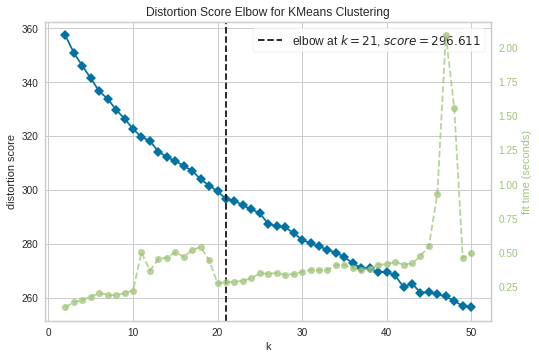

In [ ]:
data, assigned_clusters = clustering_question(data, no_clusters)

In [ ]:
type(assigned_clusters)

list

In [ ]:
clustered = {}
for i in range(len(assigned_clusters)):
  if assigned_clusters[i] in clustered:
    clustered[assigned_clusters[i]].append(keys[i])
  else:
    clustered[assigned_clusters[i]] = [keys[i]]

In [ ]:
clustered

{16: ['Beyoncé',
  'Kanye_West',
  'Buddhism',
  'Cardinal_(Catholicism)',
  'Heresy',
  'Christian',
  'Hunter-gatherer',
  'Hydrogen',
  'Wood',
  'Imamah_(Shia_doctrine)',
  'Copper',
  'Orthodox_Judaism',
  'Beer',
  'Mary_(mother_of_Jesus)',
  'Sanskrit',
  'Ashkenazi_Jews',
  'Presbyterianism',
  'Jews',
  'Alloy',
  'Avicenna',
  'Baptists',
  'Crucifixion_of_Jesus',
  'Hindu_philosophy',
  'Dominican_Order',
  'God',
  'Samurai',
  'Glass',
  'Green',
  'Zinc',
  'Elevator',
  'Quran',
  'Pain',
  'Immaculate_Conception',
  'Red',
  'Religion_in_ancient_Rome',
  'Protestantism',
  'Jehovah%27s_Witnesses',
  'Police'],
 0: ['Frédéric_Chopin',
  'Prime_minister',
  'Arnold_Schwarzenegger',
  'Alexander_Graham_Bell',
  'Virgil',
  'John,_King_of_England',
  'Athanasius_of_Alexandria',
  'Bill_%26_Melinda_Gates_Foundation',
  'Napoleon',
  'Edmund_Burke',
  'Pope_Paul_VI',
  'History_of_science',
  'Gamal_Abdel_Nasser',
  'Pope_John_XXIII',
  'John_von_Neumann',
  'George_VI',
  'K

In [ ]:
data

{'text': ['Beyoncé',
  'Frédéric_Chopin',
  'Sino-Tibetan_relations_during_the_Ming_dynasty',
  'IPod',
  'The_Legend_of_Zelda:_Twilight_Princess',
  'Spectre_(2015_film)',
  '2008_Sichuan_earthquake',
  'New_York_City',
  'To_Kill_a_Mockingbird',
  'Solar_energy',
  'Kanye_West',
  'Buddhism',
  'American_Idol',
  'Dog',
  '2008_Summer_Olympics_torch_relay',
  'Genome',
  'Comprehensive_school',
  'Republic_of_the_Congo',
  'Prime_minister',
  'Institute_of_technology',
  'Wayback_Machine',
  'Dutch_Republic',
  'Symbiosis',
  'Canadian_Armed_Forces',
  'Cardinal_(Catholicism)',
  'Iranian_languages',
  'Lighting',
  'Separation_of_powers_under_the_United_States_Constitution',
  'Architecture',
  'Human_Development_Index',
  'Southern_Europe',
  'BBC_Television',
  'Arnold_Schwarzenegger',
  'Plymouth',
  'Heresy',
  'Warsaw_Pact',
  'Materialism',
  'Christian',
  'Sony_Music_Entertainment',
  'Oklahoma_City',
  'Hunter-gatherer',
  'United_Nations_Population_Fund',
  'Russian_Soviet

In [ ]:
centroid_list_df = data["centroid"]
cluster_list_df = data["cluster"]
centroid_list = [1 for i in range(no_clusters)]
for i in range(len(cluster_list_df)):
  centroid_list[cluster_list_df[i]] =  list(centroid_list_df[i])

In [ ]:
centroid_list

[[-0.053048125501456,
  0.046885249263141304,
  -0.016000283815498863,
  0.003428627984249033,
  -0.0329442152100715,
  0.024935414123839497,
  0.06754826105731938,
  0.021356352089372064,
  0.02041448375842135,
  0.020483507500362715,
  -0.00841991824771477,
  -0.024759507488592396,
  -0.005846500982962815,
  0.007702047221495637,
  -0.05015957817834403,
  0.027961352529798335,
  -0.0240267608979983,
  0.024392743557525267,
  -0.00431698085386805,
  -0.034528382505024116,
  -0.0447110443076651,
  0.031649642475063695,
  -0.002073314706129688,
  -0.0028036140886667582,
  0.01010665755685685,
  0.012267807481943498,
  -0.01065199724897476,
  -0.017614122954130704,
  0.0016912852702911806,
  -0.03594007712256696,
  0.010096831962333193,
  -0.04796272885453488,
  0.006421280459367803,
  -0.000797577291710435,
  -0.017018313184962608,
  -0.003595320890391511,
  -0.0037449007706576204,
  0.022441389704389234,
  0.031232901516237428,
  0.011106671748815904,
  -0.01894149895191991,
  -0.02728

In [ ]:
len(centroid_list)

21

In [ ]:
theme = "The indian subcontinent"
test_embedding = model.encode(theme)
# print(test_embedding)

In [ ]:
!pip install scipy
from scipy.spatial import distance

cluster_no = 0
cluster_val = distance.cosine(centroid_list[0], test_embedding)
for i, item in enumerate(centroid_list):
  # print(i)
  # print(item)
  val = distance.cosine(item, test_embedding)
  if( val < cluster_val):
    cluster_no = i
    cluster_val = val

print(clustered[cluster_no])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
['Republic_of_the_Congo', 'United_Nations_Population_Fund', 'Communications_in_Somalia', 'Guinea-Bissau', 'Somalis', 'Eritrea', 'Umayyad_Caliphate', 'Israel', 'East_India_Company', 'Southeast_Asia', 'Myanmar', 'Mali', 'Nigeria', 'Alsace', 'Sahara', 'Tibet', 'Central_African_Republic', 'Estonia', 'Ottoman_Empire', 'Rajasthan', 'Han_dynasty', 'Armenia', 'Muslim_world', 'Iran', 'Liberia', 'Swaziland', 'Namibia', 'Egypt', 'Armenians', 'Genocide', 'Tajikistan']


In [ ]:
type(centroid_list[0])

list

In [ ]:
clustering_data = {"clusters": clustered, "centroids" : centroid_list}

In [ ]:
clustering_data

{'clusters': {16: ['Beyoncé',
   'Kanye_West',
   'Buddhism',
   'Cardinal_(Catholicism)',
   'Heresy',
   'Christian',
   'Hunter-gatherer',
   'Hydrogen',
   'Wood',
   'Imamah_(Shia_doctrine)',
   'Copper',
   'Orthodox_Judaism',
   'Beer',
   'Mary_(mother_of_Jesus)',
   'Sanskrit',
   'Ashkenazi_Jews',
   'Presbyterianism',
   'Jews',
   'Alloy',
   'Avicenna',
   'Baptists',
   'Crucifixion_of_Jesus',
   'Hindu_philosophy',
   'Dominican_Order',
   'God',
   'Samurai',
   'Glass',
   'Green',
   'Zinc',
   'Elevator',
   'Quran',
   'Pain',
   'Immaculate_Conception',
   'Red',
   'Religion_in_ancient_Rome',
   'Protestantism',
   'Jehovah%27s_Witnesses',
   'Police'],
  0: ['Frédéric_Chopin',
   'Prime_minister',
   'Arnold_Schwarzenegger',
   'Alexander_Graham_Bell',
   'Virgil',
   'John,_King_of_England',
   'Athanasius_of_Alexandria',
   'Bill_%26_Melinda_Gates_Foundation',
   'Napoleon',
   'Edmund_Burke',
   'Pope_Paul_VI',
   'History_of_science',
   'Gamal_Abdel_Nasser',

In [ ]:
import json
with open("cluster.json", "w") as outfile:
    json.dump(clustering_data, outfile)